In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from math import sqrt
import scipy.stats
import matplotlib.pyplot as plt

# Question number 1

A F and B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [ ]:
cutlet=pd.read_csv("/content/Cutlets.csv")

In [ ]:
cutlet.shape

(35, 3)

In [ ]:
cutlet.head()

,Unit A,Unit B,diff
0,6.8090,6.7703,0.0387
1,6.4376,7.5093,-1.0717
2,6.9157,6.7300,0.1857
3,7.3012,6.7878,0.5134
4,7.4488,7.1522,0.2966


In [ ]:
Cutlet_data=cutlet.describe()
Cutlet_data

,Unit A,Unit B,diff
count,35.000000,35.000000,35.000000
mean,7.019091,6.964297,0.054794
std,0.288408,0.343401,0.430113
min,6.437600,6.038000,-1.071700
25%,6.831500,6.753600,-0.232400
50%,6.943800,6.939900,0.054900
75%,7.280550,7.195000,0.349050
max,7.516900,7.545900,0.887600


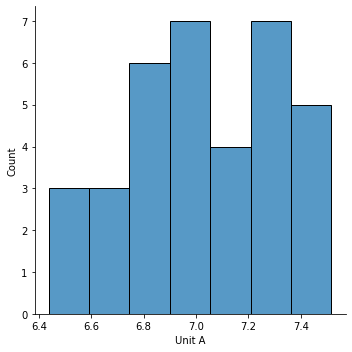

In [ ]:
sns.displot(cutlet.iloc[:,0])

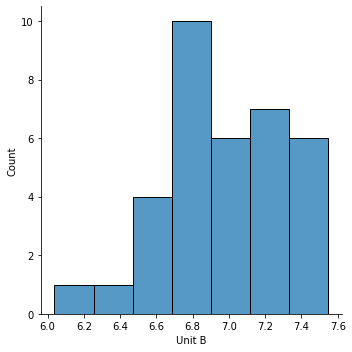

In [ ]:
sns.displot(cutlet.iloc[:,1])

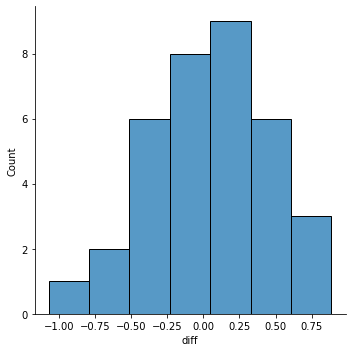

In [ ]:
sns.displot(cutlet.iloc[:,2])

In [ ]:
stats.norm.ppf(0.95, loc=7.019, scale=0.288408)

7.49338894484182

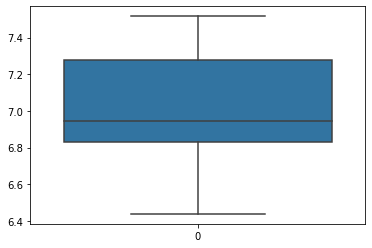

In [ ]:
ax=sns.boxplot(data=cutlet.iloc[:,0])

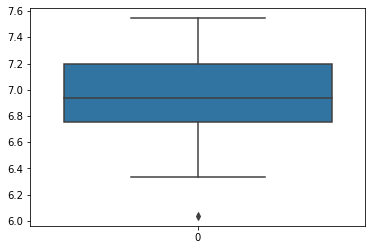

In [ ]:
ax=sns.boxplot(data=cutlet.iloc[:,1])

In [ ]:
# 2-sample 2-tail ttest:
p_value=stats.ttest_ind(cutlet.iloc[:,0],cutlet.iloc[:,1])
p_value

Ttest_indResult(statistic=0.7228688704678061, pvalue=0.4722394724599501)

Result:
Since p-value > 0.05, we can accept the null hypothesis. That is, there is no significant difference between the diameters of the cutlet from both units.

#Question number 2 Hypothesis testing Anova Labtat

In [ ]:
Labtat=pd.read_csv("/content/LabTAT.csv")
Labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


(array([ 3.,  1.,  6., 17., 26., 30., 23.,  8.,  4.,  2.]),
 array([138.3  , 146.109, 153.918, 161.727, 169.536, 177.345, 185.154,
        192.963, 200.772, 208.581, 216.39 ]),
 <a list of 10 Patch objects>)

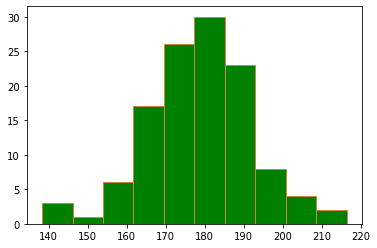

In [ ]:
  plt.hist(Labtat['Laboratory 1'], facecolor="green", edgecolor='peru')

(array([ 2.,  4., 13., 23., 18., 26., 14., 15.,  2.,  3.]),
 array([140.55 , 148.281, 156.012, 163.743, 171.474, 179.205, 186.936,
        194.667, 202.398, 210.129, 217.86 ]),
 <a list of 10 Patch objects>)

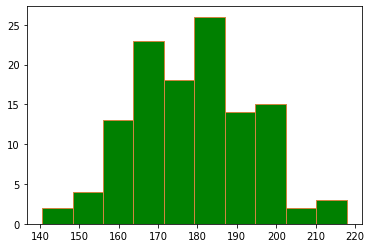

In [ ]:
plt.hist(Labtat['Laboratory 2'], facecolor="green", edgecolor='peru')

(array([ 1.,  8., 15., 11., 23., 22., 21.,  8.,  6.,  5.]),
 array([159.69 , 167.591, 175.492, 183.393, 191.294, 199.195, 207.096,
        214.997, 222.898, 230.799, 238.7  ]),
 <a list of 10 Patch objects>)

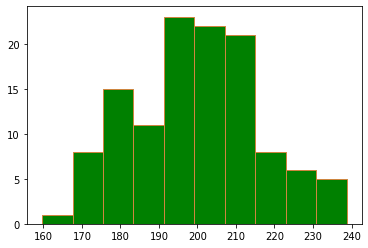

In [ ]:
plt.hist(Labtat['Laboratory 3'], facecolor="green", edgecolor='peru')

(array([ 3.,  5.,  9., 17., 26., 30., 16.,  9.,  2.,  3.]),
 array([124.06 , 132.172, 140.284, 148.396, 156.508, 164.62 , 172.732,
        180.844, 188.956, 197.068, 205.18 ]),
 <a list of 10 Patch objects>)

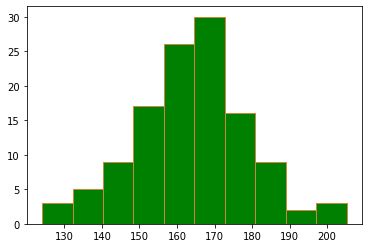

In [ ]:
plt.hist(Labtat['Laboratory 4'], facecolor="green", edgecolor='peru')

In [ ]:
stats.f_oneway(Labtat.iloc[:,0],Labtat.iloc[:,1], Labtat.iloc[:,2], Labtat.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [ ]:
f_critical=scipy.stats.f.ppf(q=1-0.05, dfn=3, dfd=476)
f_critical

2.6236374659506096

As found F Critical value< F calculated so We will reject null hypothesis

H0= All 4 Samples are same there's no Significant difference

H1= Samples are Significantly Different

# Question number 3 buyer ratio Chi Square

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
Buyer_ratio=pd.read_csv("/content/BuyerRatio.csv", header=None)
Buyer_ratio.head()

,0,1,2,3,4
0,Observed Values,East,West,North,South
1,Males,50,142,131,70
2,Females,435,1523,1356,750


In [ ]:
df=(Buyer_ratio.iloc[:,1:])
df

,1,2,3,4
0,East,West,North,South
1,50,142,131,70
2,435,1523,1356,750


In [ ]:
Buyer1=(Buyer_ratio.iloc[1:,1:])
Buyer1

,1,2,3,4
1,50,142,131,70
2,435,1523,1356,750


In [ ]:
Buyer1.dtypes

1    object
2    object
3    object
4    object
dtype: object

In [ ]:
buyer2=Buyer1.apply(pd.to_numeric)

In [ ]:
buyer2.dtypes

1    int64
2    int64
3    int64
4    int64
dtype: object

In [ ]:
chi2_contingency(buyer2)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 50. ,  88.5, 127. , 165.5, 204. , 242.5, 281. , 319.5, 358. ,
        396.5, 435. ]),
 <a list of 10 Patch objects>)

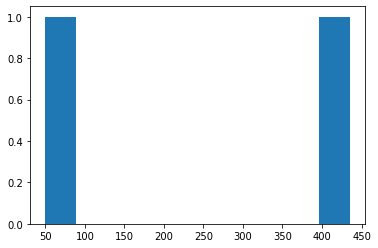

In [ ]:
plt.hist(Buyer_ratio["East"])

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 142. ,  280.1,  418.2,  556.3,  694.4,  832.5,  970.6, 1108.7,
        1246.8, 1384.9, 1523. ]),
 <a list of 10 Patch objects>)

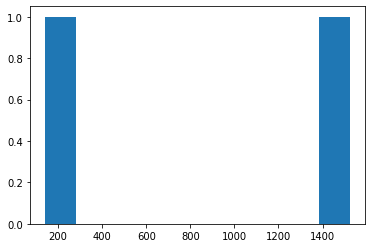

In [ ]:
plt.hist(Buyer_ratio["West"])

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 131. ,  253.5,  376. ,  498.5,  621. ,  743.5,  866. ,  988.5,
        1111. , 1233.5, 1356. ]),
 <a list of 10 Patch objects>)

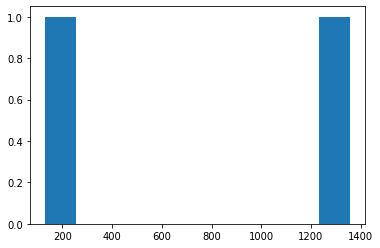

In [ ]:
plt.hist(Buyer_ratio["North"])

Chi critical > Chi calculated hence we are failed to reject Null hypothesis .

Also P value is 0.66 which is more than Alpha 0.05

H0= All 4 Samples are same there's no Significant difference

H1= Samples are Significantly Different

# Question number 4 Customer forms Anova

H0= Defective % not Varies by centre

H1= Defective Percentage varies by Centre

In [ ]:
form=pd.read_csv("/content/Costomer+OrderForm.csv")
form

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [ ]:
type(form)
form.shape

(300, 4)

In [ ]:
form.dtypes

Phillippines    object
Indonesia       object
Malta           object
India           object
dtype: object

In [ ]:
form.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [ ]:
form1=pd.get_dummies(form,columns=["Phillippines","Indonesia","Malta", "India" ])

In [ ]:
form1.head()

,Phillippines_Defective,Phillippines_Error Free,Indonesia_Defective,Indonesia_Error Free,Malta_Defective,Malta_Error Free,India_Defective,India_Error Free
0,0,1,0,1,1,0,0,1
1,0,1,0,1,0,1,1,0
2,0,1,1,0,1,0,0,1
3,0,1,0,1,0,1,0,1
4,0,1,0,1,1,0,0,1


In [ ]:
x={"Error Free":1, "Defective":0}

In [ ]:
form2=form.replace(x)
form2.head()

,Phillippines,Indonesia,Malta,India
0,1,1,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,1,1
4,1,1,0,1


In [ ]:
from scipy.stats.stats import f_oneway
f_oneway(form2.iloc[:,0], form2.iloc[:,1], form2.iloc[:,2], form2.iloc[:,3])

F_onewayResult(statistic=1.286168556089167, pvalue=0.2776780955705948)

In [ ]:
form2.shape

(300, 4)

In [ ]:
f_critical=scipy.stats.f.ppf(q=1-0.05, dfn=3, dfd=1196)
f_critical

2.6123434645055075

F critical > F calculated hence we are failed to reject Null hypothesis.

P value >Alpha 0.05